In [41]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.under_sampling import RandomUnderSampler
# import xgboost as xgb
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve, roc_auc_score, plot_roc_curve, f1_score, plot_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV



In [42]:
LoanStatData = pd.read_csv('./Loan_status_2007-2020Q3.gzip')
#Checking the data
LoanStatData.describe()

/var/folders/sk/qnqfmc1n43xcb8gqr40z974c0000gn/T/ipykernel_18817/3177714401.py:1: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  LoanStatData = pd.read_csv('./Loan_status_2007-2020Q3.gzip')


,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,2.925493e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925492e+06,2.925488e+06,2.922384e+06,2.925463e+06,2.925492e+06,2.925492e+06,...,197824.000000,197824.000000,197824.000000,143638.000000,182076.000000,143638.000000,143637.000000,179240.000000,182076.000000,182076.000000
mean,8.697419e+04,1.535878e+04,1.535470e+04,1.534005e+04,4.523914e+02,7.993727e+04,1.929648e+01,2.897012e-01,7.005110e+02,7.045112e+02,...,12.544398,0.038327,0.067545,2.233427,119.887400,2.233427,2.323148,369.367460,11993.128927,745.504875
std,8.048842e+04,9.478383e+03,9.477145e+03,9.480634e+03,2.729478e+02,1.117476e+05,1.571977e+01,8.436819e-01,3.376565e+01,3.376653e+01,...,8.206977,0.362390,0.371836,0.565689,247.522976,0.565689,6.179453,468.696526,9162.902724,2095.316599
min,0.000000e+00,5.000000e+02,5.000000e+02,0.000000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,6.140000e+02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.284100e+04,8.000000e+03,8.000000e+03,8.000000e+03,2.535000e+02,4.700000e+04,1.208000e+01,0.000000e+00,6.750000e+02,6.790000e+02,...,7.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,104.280000,4749.142500,259.040000
50%,6.892500e+04,1.300000e+04,1.300000e+04,1.300000e+04,3.823000e+02,6.600000e+04,1.810000e+01,0.000000e+00,6.950000e+02,6.990000e+02,...,11.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,249.474420,9967.160000,423.200000
75%,1.072940e+05,2.000000e+04,2.000000e+04,2.000000e+04,6.039200e+02,9.500000e+04,2.488000e+01,0.000000e+00,7.200000e+02,7.240000e+02,...,17.000000,0.000000,0.000000,2.000000,101.940000,2.000000,0.000000,482.532500,17640.670000,679.580000
max,4.210940e+05,4.000000e+04,4.000000e+04,4.000000e+04,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,121.000000,21.000000,23.000000,4.000000,2797.500000,4.000000,82.000000,11581.820000,42135.550000,40270.980000


In [43]:
LoanStatData = LoanStatData[LoanStatData['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]
LoanStatData.dtypes

Unnamed: 0                                      int64
id                                             object
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
                                               ...   
hardship_loan_status                           object
orig_projected_additional_accrued_interest    float64
hardship_payoff_balance_amount                float64
hardship_last_payment_amount                  float64
debt_settlement_flag                           object
Length: 142, dtype: object

In [44]:
#creatubg a column for the year in the data set
LoanStatData['year'] = pd.to_datetime(LoanStatData['issue_d']).dt.year

In [45]:
#creating FICO for the setting range
LoanStatData['fico'] = LoanStatData.apply(lambda r: (r.fico_range_low + r.fico_range_high) / 2, axis=1)


[Text(0.5, 1.0, 'Taking new loans to pay for other assets is loan debt consolidation ')]

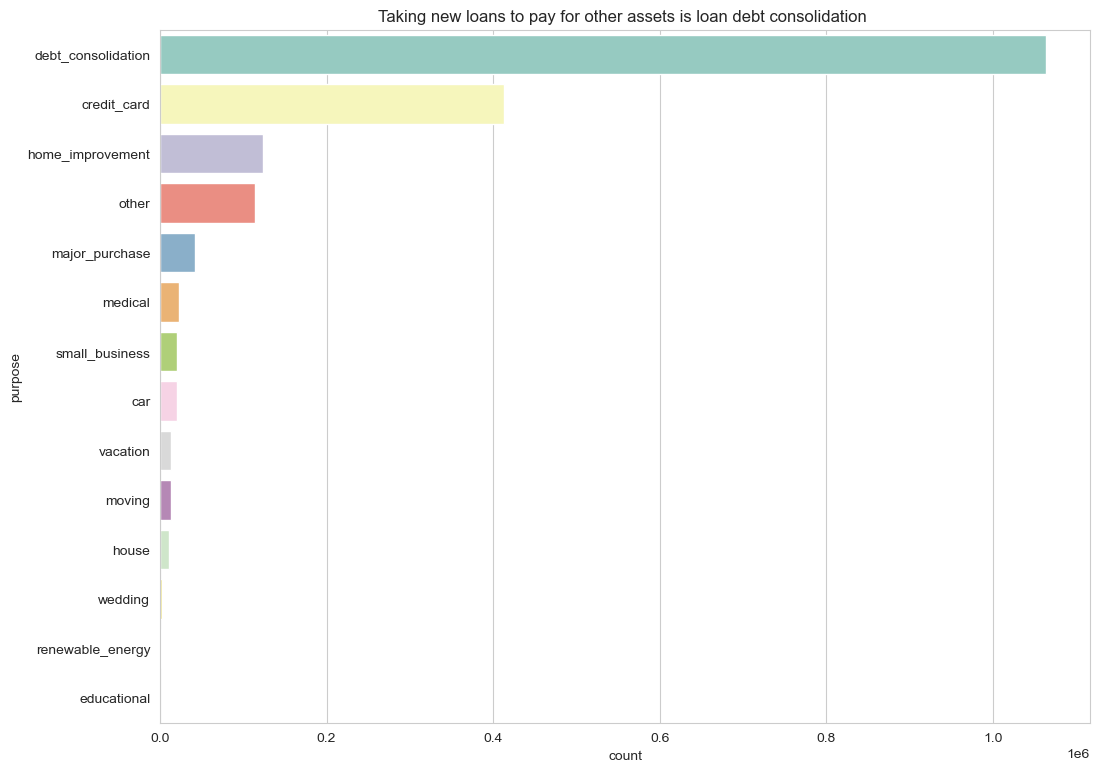

In [46]:
plt.figure(figsize=(12,9))
ax = sns.countplot(y="purpose", data=LoanStatData, palette="Set3",
                   order=LoanStatData['purpose'].value_counts().index,
                   dodge=False)
ax.set(title="Taking new loans to pay for other assets is loan debt consolidation ")

In [47]:
ax.get_figure().savefig('1_1.jpg')

In [48]:
#maximum amount of loans in the dataset are four states that are from California, Texas, New York and Florida.
#finding frequency of loans given to different states
statewise_loan_freq = LoanStatData.groupby(['addr_state'], as_index=False).size()
statewise_loan_freq

,addr_state,size
0,AK,4343
1,AL,22802
2,AR,14087
3,AZ,45521
4,CA,264525
5,CO,40501
6,CT,28161
7,DC,4549
8,DE,5264
9,FL,133643


In [57]:
fig = go.Figure(
    data=go.Choropleth(
        locations=list(statewise_loan_freq['addr_state'].values),
        z = list(statewise_loan_freq['size'].values),
        locationmode = 'USA-states',
        colorscale = 'Rainbow'
    ))

fig.update_layout(
    title_text = 'Offered Loans from different State',
    geo_scope='usa',
)

fig.show()

In [59]:
dti_non_null = LoanStatData[~LoanStatData['dti'].isnull()]

In [60]:
dti_non_null

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,year,fico
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,737.0
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,742.0
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,737.0
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,692.0
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2011,697.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,672.0
2925489,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,727.0
2925490,105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,707.0
2925491,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,2017,672.0


[Text(0.5, 1.0, 'Debt-to-Income ratio has many outliers - Very right-skewed.')]

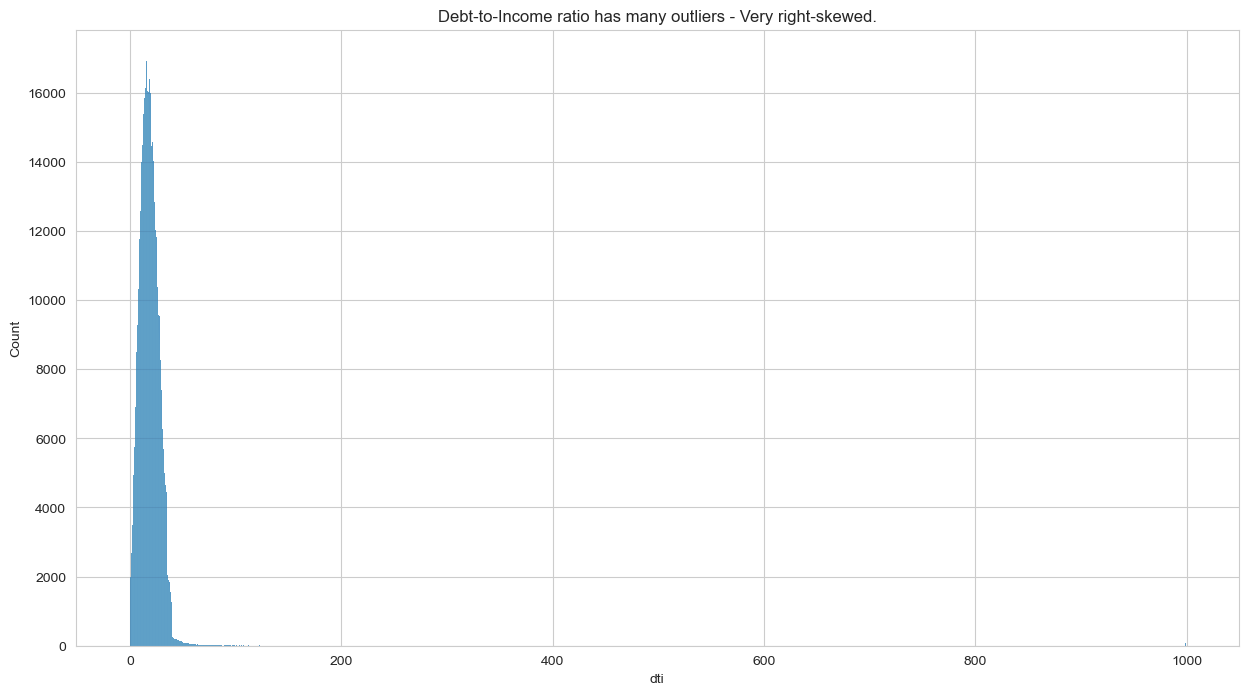

In [61]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(x="dti", data=dti_non_null)
ax.set(title="Debt-to-Income ratio has many outliers - Very right-skewed.")


In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.histplot(x="dti", kde=True, data=dti_non_null[dti_non_null.dti <= 40])
ax.set(title="Debt-to-Income ratio below 40 is somewhat normal")